In [1]:
# Import modules
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.metrics import top_k_categorical_accuracy

In [8]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [9]:
train = import_data(r'../input/emnist/emnist-letters-train.csv')
test = import_data(r'../input/emnist/emnist-letters-test.csv')

print("Train: %s, Test: %s" %(train.shape, test.shape))

Memory usage of dataframe is 531.82 MB
Memory usage after optimization is: 124.57 MB
Decreased by 76.6%
Memory usage of dataframe is 88.63 MB
Memory usage after optimization is: 20.10 MB
Decreased by 77.3%
Train: (88799, 785), Test: (14799, 785)


In [ ]:
# iam_1 = import_data('../input/iam-edited/iam_1_edit.csv')
# iam_2 = import_data('../input/iam-edited/iam_2_edit.csv')
# iam_3 = import_data('../input/iam-edited/iam_3_edit.csv')
# iam_4 = import_data('../input/iam-edited/iam_11_edit.csv')

In [ ]:
# iam = pd.concat([iam_1,iam_2,iam_3,iam_4],axis=0)
# iam.columns = train.columns.values

# iam_35_labels = list(iam['35'].values)
# iam_labels = []

# for i in iam['35'].values:
#     if i < 58:
#         i -= 48
#         iam_labels.append(i)
#     elif 58 < i < 91:
#         i -= 55
#         iam_labels.append(i)
#     elif 91 < i:
#         i -= 61
#         iam_labels.append(i)

# iam['35'].replace(dict(zip(iam_35_labels,iam_labels)),inplace=True)
# iam

In [10]:
mapp = pd.read_csv(
    r'../input/emnist/emnist-letters-mapping.txt',
    delimiter=' ',
    index_col=0,
    header=None,
    squeeze=True
)

In [ ]:
# train_half = pd.DataFrame(columns=list(train.columns.values))

# for label in mapp.values:
#     train_label = train[train['35']==(label-48)]
#     train_label = train_label.iloc[::2]
#     train_half = pd.concat([train_half,train_label],axis=0)
    

In [ ]:
# train_x_half = train_half.iloc[:,1:] # Get the images
# train_y_half = train_half.iloc[:,0] # Get the label

# del train_half

In [ ]:
# train_x_half = np.asarray(train_x_half)
# train_x_half = np.apply_along_axis(rotate, 1, train_x_half)
# print ("train_x:",train_x_half.shape)

In [ ]:
# iam_x = iam.iloc[:,1:] # Get the images
# iam_y = iam.iloc[:,0] # Get the label

# del iam

In [ ]:
# iam_x = np.asarray(iam_x)
# iam_x = np.apply_along_axis(rotate, 1, iam_x)
# print ("iam_x:",iam_x.shape)

In [ ]:
# train_x = np.concatenate((train_x_half,iam_x),axis=0)
# print(train_x.shape)
# train_y = np.concatenate((train_y_half,iam_y),axis=0)
# print(train_y.shape)

# del train_x_half
# del train_y_half
# del iam_x
# del iam_y

In [ ]:
# train_new = pd.concat([train_half,iam],0)
# train_new.shape

In [11]:
# Constants
HEIGHT = 28
WIDTH = 28

# del train_half
# del iam 

In [12]:
# Split x and y
train_x = train.iloc[:,1:] # Get the images
train_y = train.iloc[:,0] # Get the label
del train # free up some memory

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

In [13]:
# Reshape and rotate EMNIST images
def rotate(image):
    image = image.reshape(HEIGHT, WIDTH)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image 

In [14]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (88799, 28, 28)
test_x: (14799, 28, 28)


In [15]:
# Normalize
train_x = train_x / 255.0
test_x = test_x / 255.0
print(type(train_x[0,0,0]))
print(type(test_x[0,0,0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


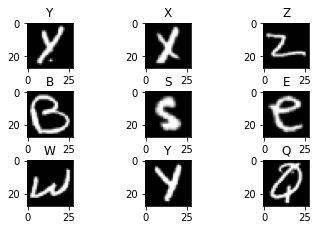

In [16]:
# Plot image
for i in range(100,109):
  plt.subplot(330 + (i+1))
  plt.subplots_adjust(hspace=0.5, top=1)
  plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
  plt.title(chr(mapp.iloc[train_y[i]-1,0]))

In [17]:
# Number of classes
num_classes = train_y.nunique() # .nunique() returns the number of unique objects
print(num_classes) 

26


In [18]:
# One hot encoding
train_y = to_categorical(train_y-1, num_classes)
test_y = to_categorical(test_y-1, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (88799, 26)
test_y:  (14799, 26)


In [19]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, 
                                                  train_y, 
                                                  test_size=0.10, 
                                                  random_state=7)

print(train_x.shape, val_x.shape, train_y.shape, val_y.shape)

(79919, 28, 28) (8880, 28, 28) (79919, 26) (8880, 26)


In [20]:
# Reshape
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)
val_x = val_x.reshape(-1, HEIGHT, WIDTH, 1)

In [30]:
# Create more images via data augmentation
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = datagen.flow(train_x, train_y, batch_size=64)
val_gen = datagen.flow(val_x, val_y, batch_size=64)

In [21]:
# Building model
# ((Si - Fi + 2P)/S) + 1

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(HEIGHT, WIDTH, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(units=num_classes, activation='softmax'))

input_shape = (None, HEIGHT, WIDTH, 1)
model.build(input_shape)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [35]:
my_callbacks = [
    # Decrease learning rate
    LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x),
    # Training will stop there is no improvement in val_loss after 3 epochs
    EarlyStopping(monitor="val_acc", 
                  patience=3, 
                  mode='max', 
                  restore_best_weights=True)
]

# def top_3_accuracy(y_true, y_pred):
#     return top_k_categorical_accuracy(y_true, y_pred, k=3)


# TRAIN NETWORKS
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(train_x, train_y, 
#                     epochs=100,
#                     verbose=1, validation_data=(val_x, val_y), 
#                     callbacks=my_callbacks)

# With datagen
history = model.fit_generator(train_gen, steps_per_epoch=train_x.shape[0]//64, epochs=100,
                              validation_data=val_gen, validation_steps=val_x.shape[0]//64, callbacks=my_callbacks)

Train for 1248 steps, validate for 138 steps
Epoch 1/100
1248/1248 [==============================] - 36s 29ms/step - loss: 0.3048 - accuracy: 0.9061 - val_loss: 0.2035 - val_accuracy: 0.9321
Epoch 2/100
1248/1248 [==============================] - 34s 27ms/step - loss: 0.2427 - accuracy: 0.9202 - val_loss: 0.1902 - val_accuracy: 0.9332
Epoch 3/100
1248/1248 [==============================] - 34s 27ms/step - loss: 0.2270 - accuracy: 0.9242 - val_loss: 0.1792 - val_accuracy: 0.9385
Epoch 4/100
1248/1248 [==============================] - 35s 28ms/step - loss: 0.2193 - accuracy: 0.9259 - val_loss: 0.1642 - val_accuracy: 0.9391
Epoch 5/100
1248/1248 [==============================] - 32s 26ms/step - loss: 0.2098 - accuracy: 0.9300 - val_loss: 0.1768 - val_accuracy: 0.9402
Epoch 6/100
1248/1248 [==============================] - 33s 27ms/step - loss: 0.2037 - accuracy: 0.9320 - val_loss: 0.1603 - val_accuracy: 0.9436
Epoch 7/100
1248/1248 [==============================] - 32s 26ms/step - 

1248/1248 [==============================] - 31s 24ms/step - loss: 0.1365 - accuracy: 0.9511 - val_loss: 0.1402 - val_accuracy: 0.9518
Epoch 57/100
1248/1248 [==============================] - 32s 25ms/step - loss: 0.1353 - accuracy: 0.9518 - val_loss: 0.1381 - val_accuracy: 0.9523
Epoch 58/100
1248/1248 [==============================] - 30s 24ms/step - loss: 0.1338 - accuracy: 0.9516 - val_loss: 0.1346 - val_accuracy: 0.9515
Epoch 59/100
1248/1248 [==============================] - 31s 24ms/step - loss: 0.1346 - accuracy: 0.9519 - val_loss: 0.1318 - val_accuracy: 0.9534
Epoch 60/100
1248/1248 [==============================] - 30s 24ms/step - loss: 0.1357 - accuracy: 0.9500 - val_loss: 0.1417 - val_accuracy: 0.9522
Epoch 61/100
1248/1248 [==============================] - 31s 25ms/step - loss: 0.1338 - accuracy: 0.9510 - val_loss: 0.1381 - val_accuracy: 0.9521
Epoch 62/100
1248/1248 [==============================] - 31s 25ms/step - loss: 0.1346 - accuracy: 0.9519 - val_loss: 0.1394 

In [43]:
# plot accuracy and loss
def plotacc(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plotloss(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [37]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

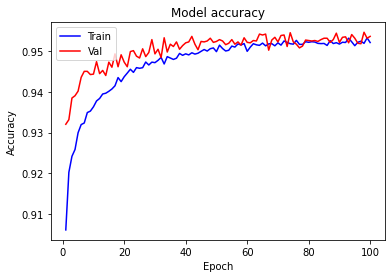

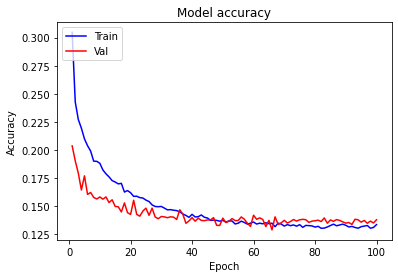

In [38]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

# loss curve
plotloss(epochs, loss, val_loss)

In [42]:
# del train_x
# del train_y

score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.15562304878689265
Test accuracy: 0.9464829


In [40]:
model.save("emnist_model_letters_aug.h5")

In [41]:
model.save_weights("emnist_model_weights_letters_aug.h5")

In [ ]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)